In [ ]:
!pip3 install seaborn
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.8 MB/s eta 0:00:00


In [ ]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)


In [ ]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
h = embed("sads")
h.shape

InvalidArgumentError: ignored

In [ ]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344491012394428, 0.00048081044224090874, 0.06595246493816376, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.05080859735608101, -0.0165243037045002, 0.015737762674689293, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.028332676738500595, -0.055862151086330414, -0.012941463850438595, ...]



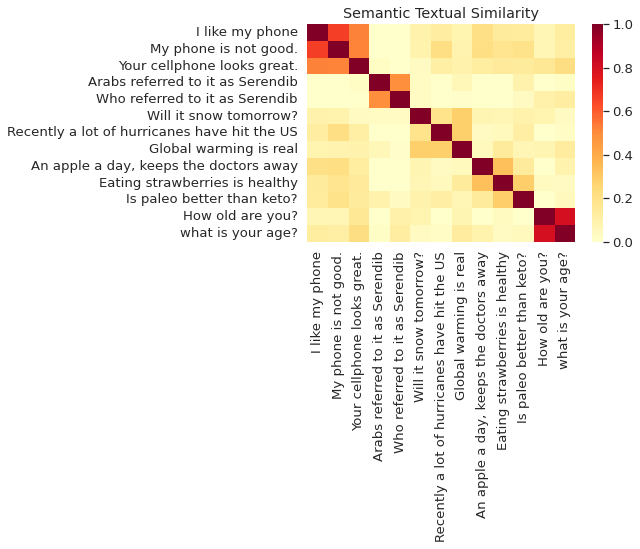

In [ ]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    'Arabs referred to it as Serendib',
    'Who referred to it as Serendib',

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [ ]:
import tensorflow_hub as hub

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def sentence_similarity(sentence1, sentence2):
    # Compute embeddings for the two sentences
    embedding1 = embed([sentence1])[0]
    embedding2 = embed([sentence2])[0]
    
    # Compute the cosine similarity between the embeddings
    similarity_score = tf.keras.losses.cosine_similarity(embedding1, embedding2)
    
    return similarity_score

In [ ]:
sentence1 = "Adrian was about to dance"
sentence2 = "Adrian is going to dance"
sentence3 = "Kamala is shopping"
similarity_score = sentence_similarity(sentence1, sentence2)
similarity_scor = sentence_similarity(sentence1, sentence3)
print(similarity_score)
print(similarity_scor)

tf.Tensor(-0.8926046, shape=(), dtype=float32)
tf.Tensor(-0.2446294, shape=(), dtype=float32)


In [ ]:
import transformers
import torch

# Load the BERT tokenizer and model
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

def sentence_similarity(sentence1, sentence2):
    # Tokenize the sentences
    input_ids1 = torch.tensor(tokenizer.encode(sentence1, add_special_tokens=True)).unsqueeze(0)
    input_ids2 = torch.tensor(tokenizer.encode(sentence2, add_special_tokens=True)).unsqueeze(0)
    
    # Compute the BERT embeddings for the sentences
    with torch.no_grad():
        embeddings1 = model(input_ids1)[0][:, 0, :]
        embeddings2 = model(input_ids2)[0][:, 0, :]
    
    # Compute the cosine similarity between the embeddings
    similarity_score = torch.nn.functional.cosine_similarity(embeddings1, embeddings2).numpy()[0]
    
    return similarity_score